In [3]:
from helpers import *
import os
print(os.getcwd())

/home/workspace/2022.micro.artifact/experiments-matmul


In [19]:
verbose = True
architecture = "/home/workspace/2022.micro.artifact/experiments-matmul/arch.yaml"
architecture2 = "/home/workspace/2022.micro.artifact/experiments-matmul/arch3.yaml"
component = "/home/workspace/2022.micro.artifact/experiments-matmul/compound_components.yaml"
ERT_output_path = "ERT.yaml"
ART_output_path = "ART.yaml"
sparse_opts = "SI-SW.yaml"
workload = "/home/workspace/2022.micro.artifact/experiments-matmul/matmul.yaml"
mapper = "/home/workspace/2022.micro.artifact/experiments-matmul/mapper.yaml"
mapping = "/home/workspace/2022.micro.artifact/experiments-matmul/timeloop_temp/timeloop-mapper.map.yaml"
constraints = "/home/workspace/2022.micro.artifact/experiments-matmul/constraints.yaml"

In [21]:
# Run Accelergy with the provided arguments
result = run_accelergy(
    architecture_yaml=architecture2,
    component_yaml=component,
    ERT_output_path=ERT_output_path,
    ART_output_path=ART_output_path
)

print(f"Generated ERT file: {result['ERT']}")
print(f"Generated ART file: {result['ART']}")

Running Accelergy command: accelergy /home/workspace/2022.micro.artifact/experiments-matmul/arch3.yaml /home/workspace/2022.micro.artifact/experiments-matmul/compound_components.yaml -o accelergy_temp -v 1
    _                _                      
   / \   ___ ___ ___| | ___ _ __ __ _ _   _ 
  / _ \ / __/ __/ _ \ |/ _ \ '__/ _` | | | |
 / ___ \ (_| (_|  __/ |  __/ | | (_| | |_| |
/_/   \_\___\___\___|_|\___|_|  \__, |\__, |
                                |___/ |___/ 

Info: generating outputs according to the following specified output flags... 
 Please use the -f flag to update the preference (default to all output files) 
{'ERT': 1, 'ERT_summary': 1, 'ART': 1, 'ART_summary': 1, 'energy_estimation': 1, 'flattened_arch': 1}
Info: config file located: /home/workspace/.config/accelergy/accelergy_config.yaml 
config file content: 
 {'version': 0.3, 'compound_components': [], 'estimator_plug_ins': ['/usr/local/share/accelergy/estimation_plug_ins'], 'primitive_components': ['/usr/local/

In [26]:
# If you want mapper
# Run Timeloop mapper with the provided arguments
result = run_timeloop_mapper(
    architecture_yaml=architecture2,
    workload=workload,
    sparse_opts=sparse_opts,
    ERT=ERT_output_path,
    ART=ART_output_path,
    output_mapping_path="searched_mapping.yaml",
    mapper=mapper,
    constraints=constraints
)

mapping_path = result["best_mapping"]
print(mapping_path)

['timeloop-mapper', '/home/workspace/2022.micro.artifact/experiments-matmul/arch3.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul/matmul.yaml', 'SI-SW.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul/constraints.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul/mapper.yaml', '--ERT', 'ERT.yaml', '--ART', 'ART.yaml', '-o', 'timeloop_temp']
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
Found Accelergy ERT (energy reference table), replacing internal energy model.
Found Accelergy ART (area reference table), replacing internal area model.
Architecture configuration complete.
Sparse optimization configuration complete.
Using threads = 16
Mapper configuration complete.
Initializing Index Factorization su

[  0] Utilization = 1.00 | pJ/Compute =  249.917 | L4[WIO] N1 - L3[] N1 - L2[] N1 - L1[] N1 - L0[] N256 M256 
[  3] Utilization = 1.00 | pJ/Compute =  249.917 | L4[WIO] N1 - L3[] N1 - L2[] N1 - L1[] M128 - L0[] N256 M2 
[  5] Utilization = 1.00 | pJ/Compute =  249.917 | L4[WIO] N1 - L3[] N1 - L2[] N1 - L1[] M64 - L0[] N256 M4 
[ 10] Utilization = 1.00 | pJ/Compute =  249.917 | L4[WIO] N1 - L3[] N1 - L2[] M2 - L1[] N1 - L0[] N256 M128 
[  6] Utilization = 1.00 | pJ/Compute =  249.917 | L4[WIO] N1 - L3[] N1 - L2[] N1 - L1[] M8 - L0[] N256 M32 
[ 14] Utilization = 1.00 | pJ/Compute =  249.917 | L4[WIO] N1 - L3[] N1 - L2[] M2 - L1[] M64 - L0[] N256 M2 
[ 11] Utilization = 1.00 | pJ/Compute =  249.917 | L4[WIO] N1 - L3[] N1 - L2[] M2 - L1[] M2 - L0[] N256 M64 
[ 15] Utilization = 1.00 | pJ/Compute =  249.917 | L4[WIO] N1 - L3[] N1 - L2[] M2 - L1[] M8 - L0[] N256 M16 
[ 12] Utilization = 1.00 | pJ/Compute =  249.917 | L4[WIO] N1 - L3[] N1 - L2[] M2 - L1[] M128 - L0[] N256 
[  1] Utilization 


               BEGIN DIAGNOSTICS               
-----------------------------------------------
Fail class: Capacity

  Level: reg
    Fail count: 55808
    Sample mapping that experienced this fail class:

      BackingStorage [ Weights:65536 (65536) Inputs:256 (256) Outputs:256 (256) ] 
      ---------------------------------------------------------------------------
      | for N in [0:1)

      iact_spad [ ] 
      -------------
      |   for N in [0:1)

      weight_spad [ Inputs:256 (256) Outputs:256 (256) ] 
      --------------------------------------------------
      |     for N in [0:1)

      psum_spad [ Weights:65536 (65536) Outputs:256 (256) ] 
      -----------------------------------------------------
      |       for N in [0:1)

      reg [ Weights:65536 (65536) ] 
      -----------------------------
      |         for N in [0:256)
      |           for M in [0:256)

    Fail reason: mapped tile size 65536 exceeds buffer capacity 1


  Level: psum_spad
    Fail coun

In [16]:
# If you already have mapping
output_path = run_timeloop(
    arch_yaml=architecture,
    workload=workload,
    sparse_opts=sparse_opts,
    mapping=mapping_path,
    constraints=constraints,
    mapper=mapper,
    ert_path=ERT_output_path,
    art_path=ART_output_path,
    output_dir="timeloop_output_test_3"
)

NameError: name 'mapping_path' is not defined

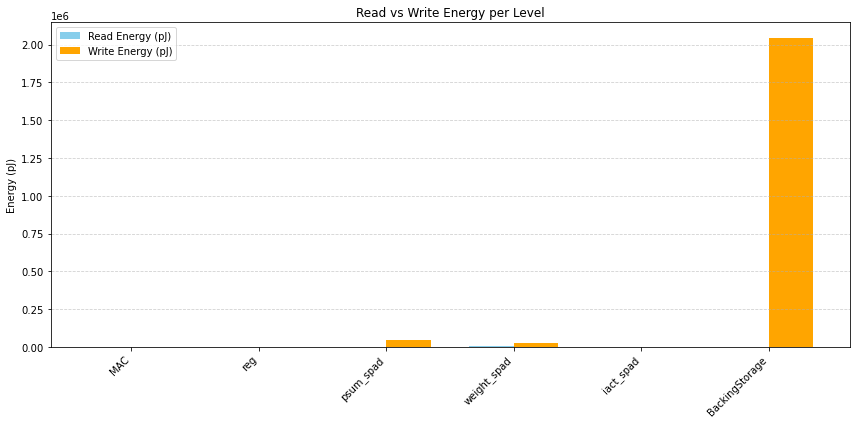

In [10]:
# Plot output
output = parse_timeloop_stats("timeloop_output_test_3/timeloop-model.map+stats.xml")
plot_read_write_energy(output["energy_breakdown_pJ"])

In [3]:
# Run Accelergy with the provided arguments
result = run_accelergy(
    architecture_yaml=architecture2,
    component_yaml=component,
    ERT_output_path=ERT_output_path,
    ART_output_path=ART_output_path
)

print(f"Generated ERT file: {result['ERT']}")
print(f"Generated ART file: {result['ART']}")

Running Accelergy command: accelergy /home/workspace/2022.micro.artifact/experiments-maggie/arch3.yaml /home/workspace/2022.micro.artifact/experiments-maggie/compound_components.yaml -o accelergy_temp -v 1
    _                _                      
   / \   ___ ___ ___| | ___ _ __ __ _ _   _ 
  / _ \ / __/ __/ _ \ |/ _ \ '__/ _` | | | |
 / ___ \ (_| (_|  __/ |  __/ | | (_| | |_| |
/_/   \_\___\___\___|_|\___|_|  \__, |\__, |
                                |___/ |___/ 

Info: generating outputs according to the following specified output flags... 
 Please use the -f flag to update the preference (default to all output files) 
{'ERT': 1, 'ERT_summary': 1, 'ART': 1, 'ART_summary': 1, 'energy_estimation': 1, 'flattened_arch': 1}
Info: config file located: /home/workspace/.config/accelergy/accelergy_config.yaml 
config file content: 
 {'version': 0.3, 'compound_components': [], 'estimator_plug_ins': ['/usr/local/share/accelergy/estimation_plug_ins'], 'primitive_components': ['/usr/local/

In [7]:
# If you want mapper
# Run Timeloop mapper with the provided arguments
result = run_timeloop_mapper(
    architecture_yaml=architecture2,
    workload=workload,
    sparse_opts=sparse_opts,
    ERT=ERT_output_path,
    ART=ART_output_path,
    output_mapping_path="searched_mapping.yaml",
    mapper=mapper,
    constraints=constraints
)

mapping_path = result["best_mapping"]

['timeloop-mapper', '/home/workspace/2022.micro.artifact/experiments-maggie/arch3.yaml', '/home/workspace/2022.micro.artifact/experiments-maggie/L07.yaml', 'SI-SW.yaml', '/home/workspace/2022.micro.artifact/experiments-maggie/constraints.yaml', '/home/workspace/2022.micro.artifact/experiments-maggie/mapper.yaml', '--ERT', 'ERT.yaml', '--ART', 'ART.yaml', '-o', 'timeloop_temp']
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
Found Accelergy ERT (energy reference table), replacing internal energy model.
Found Accelergy ART (area reference table), replacing internal area model.
Architecture configuration complete.
Sparse optimization configuration complete.
Using threads = 16
Mapper configuration complete.
Initializing Index Factorization subsp

[  2] Utilization = 1.00 | pJ/Algorithmic-Compute =  123.847 | pJ/Compute = 259725786.585 | L4[WIO] E32 - L3[] F4 - L2[] G1 - L1[] F8 - L0[] M64 C64 
[ 11] Utilization = 1.00 | pJ/Algorithmic-Compute =  123.847 | pJ/Compute = 259725786.585 | L4[WIO] E2 - L3[] F4 - L2[] E2 - L1[] F8 E8 - L0[] M64 C64 
[ 10] Utilization = 1.00 | pJ/Algorithmic-Compute =  123.847 | pJ/Compute = 259725786.585 | L4[WIO] E2 - L3[] F4 - L2[] E2 - L1[] F8 E4 - L0[] M64 C64 E2 
[  5] Utilization = 1.00 | pJ/Algorithmic-Compute =  123.847 | pJ/Compute = 259725786.585 | L4[WIO] E2 - L3[] F4 - L2[] G1 - L1[] F8 E16 - L0[] M64 C64 
[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =  123.847 | pJ/Compute = 259725786.585 | L4[WIO] E2 - L3[] F4 - L2[] G1 - L1[] F8 - L0[] M64 C64 E16 
[ 15] Utilization = 1.00 | pJ/Algorithmic-Compute =  123.847 | pJ/Compute = 259725786.585 | L4[WIO] E2 - L3[] F4 - L2[] E4 - L1[] F8 E4 - L0[] M64 C64 
[  9] Utilization = 1.00 | pJ/Algorithmic-Compute =  123.847 | pJ/Compute = 259725786


               BEGIN DIAGNOSTICS               
-----------------------------------------------
-----------------------------------------------
                 END DIAGNOSTICS               


Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Algorithmic-Compute =  123.847 | pJ/Compute = 259725786.585


In [8]:
# If you already have mapping
# mapping_path = "/home/workspace/2022.micro.artifact/experiments-maggie/custom_mapping.yaml"
output_path = run_timeloop(
    arch_yaml=architecture2,
    workload=workload,
    sparse_opts=sparse_opts,
    mapping=mapping_path,
    constraints=constraints,
    mapper=mapper,
    ert_path=ERT_output_path,
    art_path=ART_output_path,
    output_dir="timeloop_output_test_3"
)

Running Timeloop:
timeloop-model /home/workspace/2022.micro.artifact/experiments-maggie/arch3.yaml /home/workspace/2022.micro.artifact/experiments-maggie/L07.yaml searched_mapping.yaml SI-SW.yaml --ERT ERT.yaml --ART ART.yaml -o timeloop_output_test_3
Timeloop completed successfully.


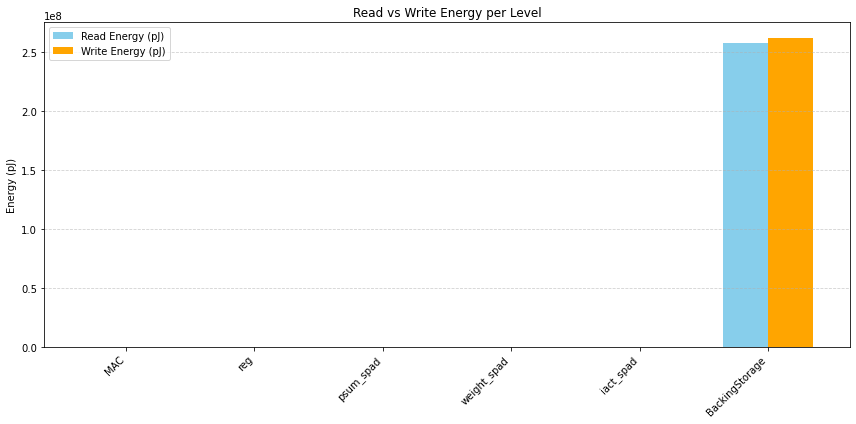

In [9]:
# Plot output
output = parse_timeloop_stats("timeloop_output_test_3/timeloop-model.map+stats.xml")
plot_read_write_energy(output["energy_breakdown_pJ"])